<a href="https://colab.research.google.com/github/Tarnished2/DataScientist/blob/main/Exercise_13_Muklis_Pramaditya_Ardian_Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification Breakoutroom

### Permasalahan

> Churn adalah salah satu peristiwa atau perilaku pelanggan beralih dari produk setelah (dalam jangka waktu tertentu) berlangganan produk. Produk dapat berupa barang atau jasa, seperti jaringan internet, penyedia telekomunikasi, dan sejenisnya. Dalam hal ini produk yang dianalisa adalah perusahaan telekomunikasi. Skema churn dapat dijelaskan dalam beberapa tahap. Tahap pertama, tahap ketika pelanggan berlangganan produk. Tahap kedua, yaitu rutinitas, atau perilaku pelanggan atau umpan balik pelanggan terhadap produk yang digunakan selama periode tertentu. Setelah itu, pada tahap ketiga, ada dua jenis, retensi (berlangganan kembali) atau churn (beralih atau berhenti berlangganan). Setiap perusahaan pasti ingin meminimalkan churn dan memaksimalkan retensi. Salah satu solusi yang dapat digunakan adalah dengan menggunakan prediksi churn pelanggan. Dengan ini, perusahaan dapat mengetahui karakteristik yang cenderung beralih atau berhenti berlangganan.

### Deskripsi Data

1.   Gender: Jenis kelamin pelanggan (Male, Female)
2.   Partner: Status pernikahan pelanggan (yes, no)
3.   Tenure: Lama beralangganan (integer; bulan)
4.   PhoneService: Apakah pelanggan menggunakan telfon (yes, no)
5.   PaperlessBilling:  Apakah pelanggan menggunakan paperless billing (yes, no)
6.   MonthlyCharges: Biaya bulanan (numeric; usd)
7.   Churn: Apakah pelanggan berhenti berlangganan atau tidak (yes, no)

> Dalam kasus ini kita akan melakukan prediksi Churn sebagai variabel respon.




## 1. Import Libraries and Data

IMPORT PACKAGES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path = '/content/drive/MyDrive/SIB/5. Supervised Machine Learning - Classification/5.1 Binary Classification - Logistic Regression/'

IMPORT DATA

In [4]:
# Load data
df = pd.read_csv(os.path.join(path, "TelcoChurn.csv"))
df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,Female,Yes,1,No,Yes,29.85,No
1,Male,No,34,Yes,No,56.95,No
2,Male,No,2,Yes,Yes,53.85,Yes
3,Male,No,45,No,No,42.30,No
4,Female,No,2,Yes,Yes,70.70,Yes


Dari data diatas maka bisa didapat keterangan bahwa

x = gender,	Partner,	tenure,	PhoneService,	PaperlessBilling,	MonthlyCharges

y = Churn

## 2. Exploratory Data Analysis (EDA)

In [5]:
# Cek informasi yang terdapat di data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Partner           7043 non-null   object 
 2   tenure            7043 non-null   int64  
 3   PhoneService      7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 385.3+ KB


mencari tahu apakah banyak yang melakukan churn?

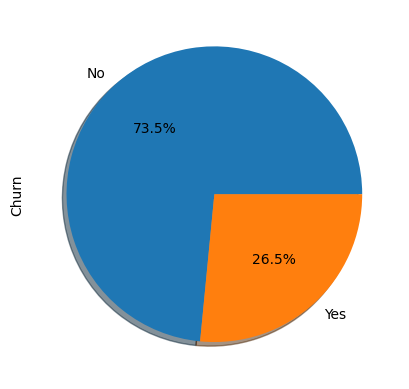

In [6]:
# Mencari perbandingan label/class
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

In [7]:
# Analisa deskriptif
df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


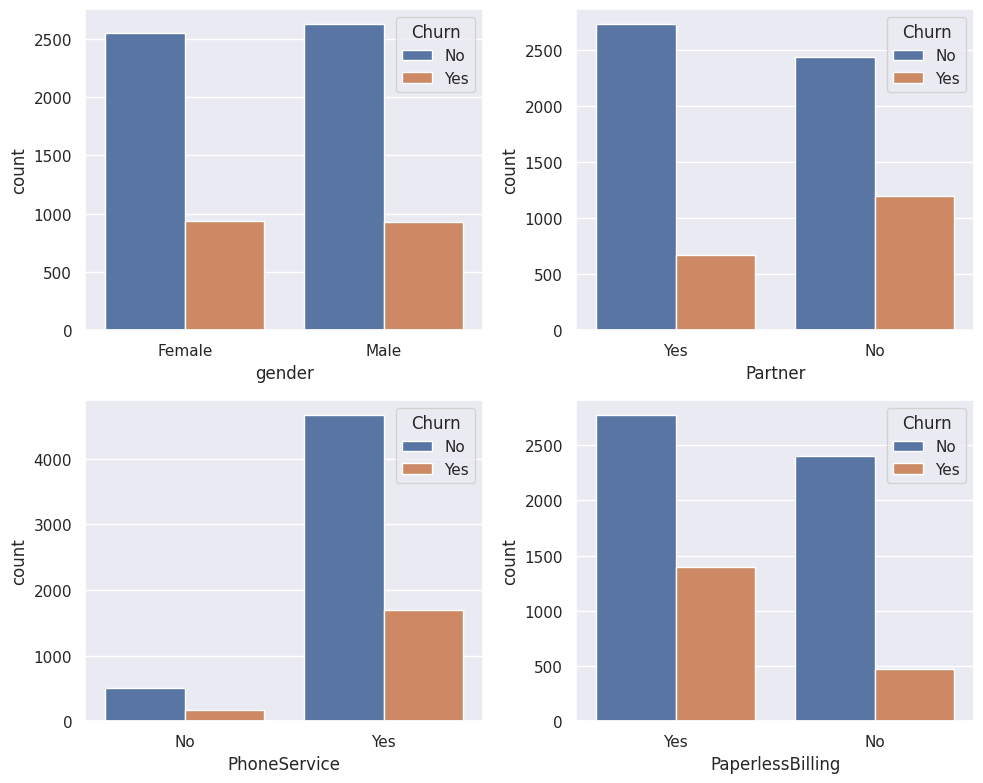

In [13]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(2,2, figsize=(10,8))

sns.countplot(data=df, x='gender', hue='Churn', ax=ax[0,0])
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0,1])
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1,0])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[1,1])
plt.tight_layout()
plt.show()

## 3 Preprocessing

### Missing Value

In [17]:
# cek missing value
df.isnull().sum()

gender              0
Partner             0
tenure              0
PhoneService        0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Dari hasil cek missing value diketahui bahwa tidak ada missing value

### Label Encoder

In [18]:
kategori = ['gender','Partner','tenure','PhoneService','PaperlessBilling','MonthlyCharges', 'Churn']
df_cat = df[kategori]
df_cat.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,Female,Yes,1,No,Yes,29.85,No
1,Male,No,34,Yes,No,56.95,No
2,Male,No,2,Yes,Yes,53.85,Yes
3,Male,No,45,No,No,42.30,No
4,Female,No,2,Yes,Yes,70.70,Yes


In [19]:
# Ubah kedalam bentuk numerik
encoded_data = LabelEncoder()

for feature in kategori:
        if feature in df.columns.values:
            df[feature] = encoded_data.fit_transform(df[feature])

df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,1,0,1,142,0
1,1,0,34,1,0,498,0
2,1,0,2,1,1,436,1
3,1,0,45,0,0,266,0
4,0,0,2,1,1,729,1


### Cek Korelasi

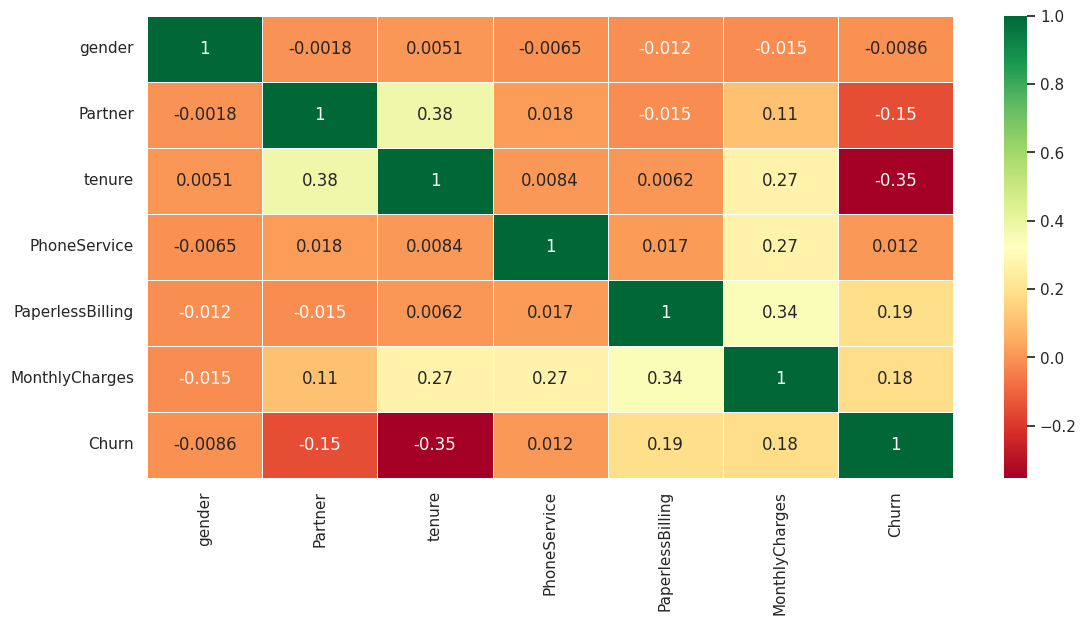

In [21]:
# Melakukan perhitungan nilai korelasi dengan mengasumsikan data adalah data interval.
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(13,6)
plt.show()

In [22]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["Churn"].sort_values()
korelasi

tenure             -0.352229
Partner            -0.150448
gender             -0.008612
PhoneService        0.011942
MonthlyCharges      0.183523
PaperlessBilling    0.191825
Churn               1.000000
Name: Churn, dtype: float64

## 4. Feature Engineering

In [23]:
df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,1,0,1,142,0
1,1,0,34,1,0,498,0
2,1,0,2,1,1,436,1
3,1,0,45,0,0,266,0
4,0,0,2,1,1,729,1


SCALING
<br>
Scaling dibutuhkan karena terdapat perbedaan range nilai yang tinggi diantara beberapa variabel.

In [24]:
transformation_svm = MinMaxScaler().fit(df[['tenure','MonthlyCharges']])
df[['tenure','MonthlyCharges']]=transformation_svm.transform(df[['tenure','MonthlyCharges']])
 
df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,0.013889,0,1,0.089646,0
1,1,0,0.472222,1,0,0.314394,0
2,1,0,0.027778,1,1,0.275253,1
3,1,0,0.625000,0,0,0.167929,0
4,0,0,0.027778,1,1,0.460227,1


## 5. Membangun Model Klasifikasi

MEMBAGI TRAIN TEST DATA

In [25]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  4930
y Train :  4930
X Test :  2113
t Test :  2113


Menggunakan data testing berjumlah 30persen dari total data, dan data training berjumlah 70persen dari total data.

### Stats Model (Logistic Regression)

In [26]:
Input = sm.add_constant(X_train)

In [27]:
model = sm.Logit(y_train, X_train, missing='drop')
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.449885
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.219      
Dependent Variable: Churn            AIC:              4447.8689  
Date:               2023-04-04 12:49 BIC:              4486.8875  
No. Observations:   4930             Log-Likelihood:   -2217.9    
Df Model:           5                LL-Null:          -2838.9    
Df Residuals:       4924             LLR p-value:      2.4620e-266
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
gender            -0.1075   0.0712  -1.5102 0.1310 -0.2471  0.0320
Partner           -0.1451   0.0794  -1.8278 0.0676 -0

In [28]:
# odds ratio
round(np.exp(result.params), 3)

gender               0.898
Partner              0.865
tenure               0.017
PhoneService         0.278
PaperlessBilling     1.557
MonthlyCharges      25.203
dtype: float64

Prediksi Model

In [29]:
prediction = result.predict(X_test)

In [30]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_test
pred_results.head()

,logreg_pred,prediksi,actual
185,0.603707,1,1
2715,0.045099,0,0
3825,0.013170,0,0
1807,0.589388,1,1
132,0.012539,0,0


### Evaluation Model

In [31]:
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.793
Test precision =  0.651
Test recall =  0.516
Test f-score =  0.575


### SKLEARN (Logistic Regression)

In [32]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,prediction
185,0,1,0.013889,0,1,0.055556,1,1
2715,1,0,0.569444,1,1,0.061237,0,0
3825,0,1,0.722222,1,0,0.010101,0,0
1807,0,0,0.013889,1,0,0.526515,1,1
132,1,0,0.930556,1,0,0.244318,0,0


In [34]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.788
Accuracy of logistic regression classifier test data: 0.794


## Klasifikasi dengan SVM

membagi train test data

In [35]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  4930
y Train :  4930
X Test :  2113
t Test :  2113


MEMBANGUN MODEL CLASSIFIER DENGAN SVC KERNEL RBF

In [36]:
classifier = SVC(kernel = 'rbf', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [37]:
#akurasi train data
X_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_pred,y_train)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7827586206896552


In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1446   93]
 [ 357  217]]


In [39]:
#akurasi test data
test_data_accuracy = accuracy_score(y_pred,y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7870326549929011


KERNEL LINIER

In [40]:
classifier = SVC(kernel = 'linear', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#akurasi test data
test_data_accuracy = accuracy_score(y_pred,y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7946048272598202


MENDAPATKAN AUC SCORE

Kurva ROC (Receiver Operating Characteristic curve); pada dasarnya,adalah plot yang merangkum kinerja klasifikasi biner model pada kelas positif. AUC disebut sebagai Area Di Bawah Kurva. Dimana sumbu X menunjukkan Tingkat False positif dan sumbu Y menunjukkan Tingkat true positif. Plot ini memberikan informasi bagaimana model memprediksi klasifikasi yang benar dan klasifikasi yang salah.

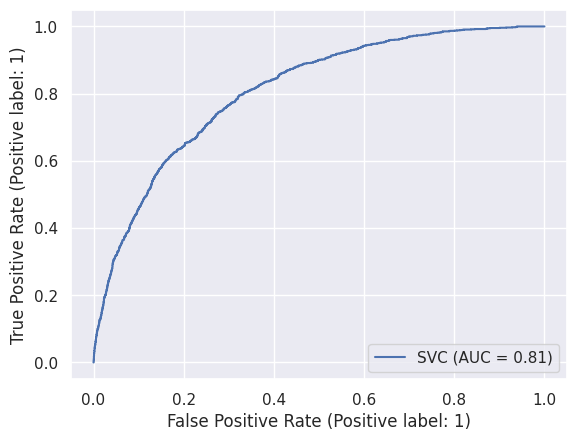

In [54]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(classifier, X_train,y_train)